In [1]:
from data import mnist
a,b = mnist()

/home/adop/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [19]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [23]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader
#import helper

path = '/home/adop/mlops/dtu_mlops/data/corruptmnist/'
train_images_list, train_labels_list = [], []

for i in range(0,6):
    train_images_path = path + f'train_images_{i}.pt'
    train_labels_path = path + f'train_target_{i}.pt'
    
    train_images = torch.load(train_images_path)
    train_labels = torch.load(train_labels_path)
    
    train_images_list.append(train_images)
    train_labels_list.append(train_labels)

train_images = torch.cat(train_images_list, dim=0)
train_labels = torch.cat(train_labels_list, dim=0)
test_images = torch.load(path+f'test_images.pt')
test_labels = torch.load(path+f'test_target.pt')
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

batch_size = 64
train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

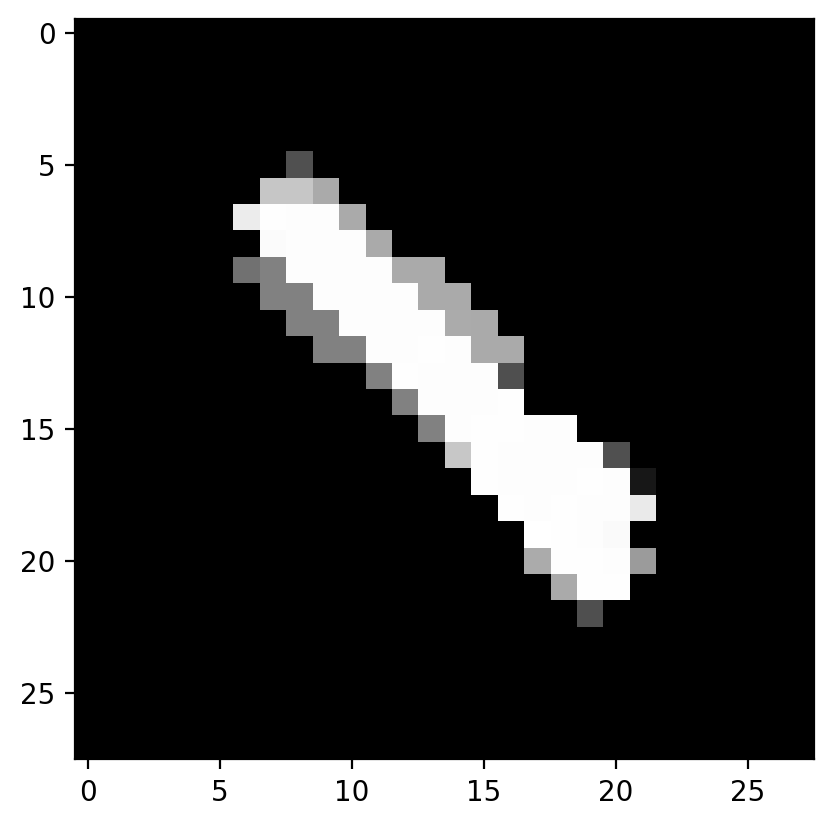

In [38]:
images, labels = next(iter(train))
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r');
x = images[2].numpy().squeeze()

In [37]:
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'gaussianBlur')

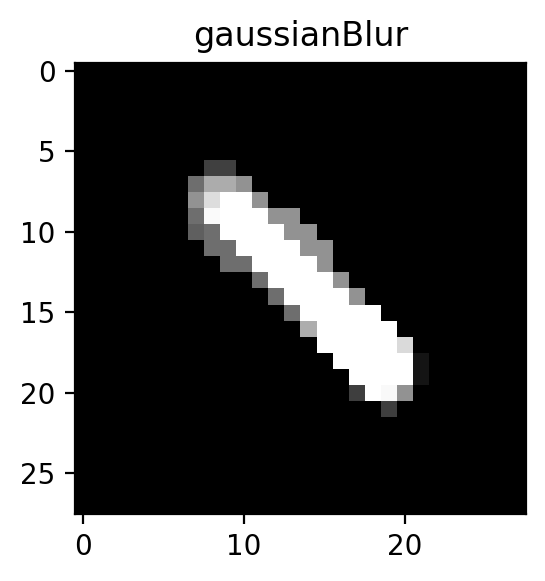

In [49]:
denoised_image = cv2.medianBlur(x,5)
plt.subplot(1, 2, 1)
plt.imshow(denoised_image, cmap='gray')
plt.title('gaussianBlur')

In [50]:
import cv2
import torch
from torchvision import datasets, transforms

# Assuming 'train' is your DataLoader for MNIST dataset
# Replace this with your actual DataLoader

transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

# Function to apply median blur to an image
def apply_median_blur(image):
    # Convert PyTorch tensor to numpy array and to uint8 format
    image_np = (image.squeeze().numpy() * 255).astype('uint8')
    # Apply median blur
    blurred_image = cv2.medianBlur(image_np, 5)
    # Convert the blurred image back to a PyTorch tensor
    blurred_tensor = torch.tensor(blurred_image / 255, dtype=torch.float32)
    return blurred_tensor

# Loop through the DataLoader and apply median blur to each image
for batch_idx, (images, labels) in enumerate(train):
    # Apply median blur to each image in the batch
    blurred_images = torch.stack([apply_median_blur(image) for image in images])
    # Replace the original images in the DataLoader with the blurred images
    # This depends on how you want to store/reuse these blurred images
    # For demonstration, printing the first blurred image
    print(f"Blurred Image Shape: {blurred_images[0].shape}")
    break  # Break after processing the first batch for demonstration


15.9%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100.0%

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Blurred Image Shape: torch.Size([28, 28])


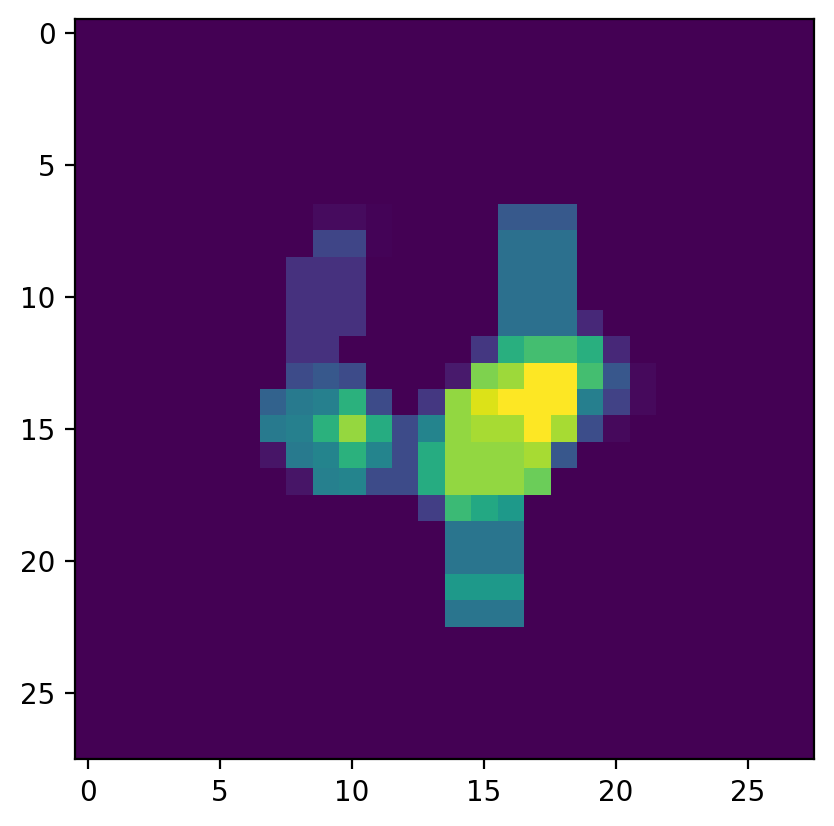

In [53]:
plt.imshow(blurred_images[5])

In [25]:
from torch import nn
import torch.nn.functional as F

class ahh(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64,10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax()
 
    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.softmax(x)
        return x

In [57]:
from torch import nn
import torch.nn.functional as F

class MyAwesomeModel(nn.Module):
    """My awesome model."""

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        #self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(32,10)
        self.dropout = nn.Dropout(p=0.3)

    def forward(self,x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        #x = self.dropout(F.relu(self.fc2(x)))
        #No dropout for output 
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

In [58]:
import click
import torch
from model import MyAwesomeModel
from data import mnist
from torch import optim
from torch import nn

In [59]:
model = MyAwesomeModel()
train_set, _ = mnist()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in train_set:
        optimizer.zero_grad()
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        output = model(images)
        # TODO: Training pass
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(train_set)}")

Training loss: 2.2975571572399343
Training loss: 2.2794353173994053
Training loss: 2.2499804095164544
Training loss: 2.1974888630767366
Training loss: 2.1069391470219787
Training loss: 1.9718861752735781
Training loss: 1.810326972241595
Training loss: 1.6560317786263505
Training loss: 1.5200458894660478
Training loss: 1.4058028096074997
Training loss: 1.317750861268562
Training loss: 1.2472335011211795
Training loss: 1.1798661374079902
Training loss: 1.1315920711326193
Training loss: 1.095376360772261
